
# Nigeria-COVID-19-Data-Analysis

## Data Collection

#### 1. NCDC Website scrap

Website - https://covid19.ncdc.gov.ng/

In [1]:
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
URL = "https://covid19.ncdc.gov.ng/"
r = requests.get(URL)
  
soup = BeautifulSoup(r.content, 'html5lib')

In [3]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <title>
   NCDC Coronavirus COVID-19 Microsite
  </title>
  <!--[if lt IE 11]>
    	<script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
    	<script src="https://oss.maxcdn.com/libs/respond.js/1.4.2/respond.min.js"></script>
    	<![endif]-->
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="" name="description"/>
  <meta content="" name="keywords"/>
  <meta content="Codedthemes" name="author"/>
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);


In [4]:
table= soup.find('table', id='custom1')
#table

In [5]:
table

<table id="custom1">
<thead>
<tr>
<th>States Affected</th>
<th>No. of Cases (Lab Confirmed)</th>
<th>No. of Cases (on admission)</th>
 <th>No. Discharged</th>
<th>No. of Deaths</th>
</tr>
</thead>
<tbody>
<tr>
<td>
Lagos
</td>
<td>102,332
</td>
<td>979
</td>
<td>100,582
</td>
<td>771
</td>
</tr>
<tr>
<td>
FCT
</td>
<td>28,949
</td>
<td>167
</td>
<td>28,533
</td>
<td>249
</td>
</tr>
<tr>
<td>
Rivers
</td>
<td>17,252
</td>
<td>383
</td>
<td>16,715
</td>
<td>154
</td>
</tr>
<tr>
<td>
Kaduna
</td>
<td>11,402
</td>
<td>88
</td>
<td>11,225
</td>
<td>89
</td>
</tr>
<tr>
<td>
Oyo
</td>
<td>10,311
</td>
<td>49
</td>
<td>10,060
</td>
<td>202
</td>
</tr>
<tr>
<td>
Plateau
</td>
<td>10,279
</td>
<td>21
 </td>
<td>10,183
</td>
<td>75
</td>
</tr>
<tr>
<td>
Edo
</td>
<td>7,821
</td>
<td>102
</td>
<td>7,398
</td>
<td>321
</td>
</tr>
<tr>
<td>
Ogun
</td>
<td>5,810
</td>
<td>11
</td>
<td>5,717
</td>
<td>82
</td>
</tr>
<tr>
<td>
Delta
</td>
<td>5,542
</td>
<td>260
</td>
<td>5,170
</td>
<td>112
</td>
</tr

In [6]:
headers = []
for i in table.find_all('th'):
    #print(i)
    title = i.text.strip()
    headers.append(title)

In [7]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [8]:
scraped_data=[]
for j in table.find_all('tr'):
    row_data = j.find_all('td')
    row = [i.text.strip() for i in row_data]
    #print(row)
    scraped_data.append(row)

In [9]:
len(scraped_data)

38

In [10]:
scraped_data.remove([])


In [11]:
len(scraped_data)

37

In [12]:
data = pd.DataFrame(scraped_data, columns=['states',
 'Lab_Confirmed_Cases',
 'Cases on admission',
 'Discharged',
 'Deaths'])

In [13]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,"102,332",979,"100,582",771
1,FCT,"28,949",167,"28,533",249
2,Rivers,"17,252",383,"16,715",154
3,Kaduna,"11,402",88,"11,225",89
4,Oyo,"10,311",49,"10,060",202


#### B. John Hopkins Data

  Global Daily Confirmed Cases 
  
  Global Daily Recovered Cases 
    
  Global Daily Death Cases 
  


In [14]:
confirmedC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')


In [15]:
recoveredC= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')


In [16]:
deathC = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

#### C. External Data

In [17]:
covidext= pd.read_csv('./data1/covid_external.csv')

In [18]:
budgetd= pd.read_csv('./data1/Budget data.csv')

In [19]:
RealGDP= pd.read_csv('./data1/RealGDP.csv')

In [20]:
Cnig= pd.read_csv('./data1/covidnig.csv')

## 2. View data

using the head() and info() method.

#### NCDC Scrapped Data

In [118]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   Lab_Confirmed_Cases  37 non-null     int64 
 2   Cases on admission   37 non-null     int64 
 3   Discharged           37 non-null     int64 
 4   Deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,102332,979,100582,771
1,FCT,28949,167,28533,249
2,Rivers,17252,383,16715,154
3,Kaduna,11402,88,11225,89
4,Oyo,10311,49,10060,202


In [26]:
data.describe()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
count,37,37,37,37,37
unique,37,37,32,37,30
top,Lagos,"102,332",0,"100,582",28
freq,1,1,4,1,3


#### John Hopkins Data

In [27]:
confirmedC.info()
confirmedC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 926 entries, Province/State to 7/31/22
dtypes: float64(2), int64(922), object(2)
memory usage: 2.0+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22,7/31/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,184360,184473,184587,184819,185086,185272,185393,185481,185552,185749
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,302767,303925,304890,305123,306789,308050,309278,310362,311381,312097
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,266700,266772,266839,266916,267010,267096,267194,267287,267374,267454
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,45326,45326,45326,45326,45326,45326,45508,45508,45508,45508
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,102301,102301,102301,102301,102301,102301,102301,102301,102301,102301


In [28]:
recoveredC.info()
recoveredC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Columns: 926 entries, Province/State to 7/31/22
dtypes: float64(2), int64(922), object(2)
memory usage: 1.9+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22,7/31/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
deathC.info()
deathC.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Columns: 926 entries, Province/State to 7/31/22
dtypes: float64(2), int64(922), object(2)
memory usage: 2.0+ MB


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22,7/31/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7738,7738,7738,7738,7742,7743,7743,7743,7745,7748
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3523,3525,3527,3529,3532,3535,3538,3541,3543,3545
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6875,6875,6876,6876,6876,6876,6876,6876,6876,6876
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1912,1912,1912,1912,1912,1912,1912,1912,1912,1912


#### External Data

In [30]:
covidext.info()
covidext.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [31]:
budgetd.info()
budgetd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [32]:
RealGDP.info()
RealGDP.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


In [33]:
Cnig.info()
Cnig.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     object
 2   No. of Cases (on admission)   37 non-null     object
 3   No. Discharged                37 non-null     object
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 1.6+ KB


,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,"26,708","2,435","24,037",236
1,FCT,"9,627","2,840","6,694",93
2,Kaduna,"4,504",579,"3,877",48
3,Plateau,"4,262",280,"3,948",34
4,Oyo,"3,788",368,"3,374",46


## 3. Data Cleaning and Preparation

Convert to appropriate datatype.

Rename the columns of the scraped data.

Remove comma(,) in numerical data

Extract daily data for Nigeria from the Global daily cases data


In [34]:
data=data.replace(',','', regex=True)

In [35]:
data.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,102332,979,100582,771
1,FCT,28949,167,28533,249
2,Rivers,17252,383,16715,154
3,Kaduna,11402,88,11225,89
4,Oyo,10311,49,10060,202


In [36]:
data.isnull().any()

states                 False
Lab_Confirmed_Cases    False
Cases on admission     False
Discharged             False
Deaths                 False
dtype: bool

In [37]:
#Converting the numerical data to integers
str_to_int= ['Lab_Confirmed_Cases','Cases on admission', 'Discharged', 'Deaths' ]
for i in str_to_int:
    data[i]= data[i].astype('int64')
    

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   Lab_Confirmed_Cases  37 non-null     int64 
 2   Cases on admission   37 non-null     int64 
 3   Discharged           37 non-null     int64 
 4   Deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


Getting daily Cases in Nigeria

In [39]:
daily = [confirmedC, recoveredC, deathC]



In [40]:
DailyC=[]
for i in daily:
    a=i[i['Country/Region']=='Nigeria']
    DailyC.append(a)
    
   

In [41]:
nigdaily= pd.concat(DailyC, axis=0)

In [42]:
nigdaily

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22,7/31/22
204,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,259720,260339,260339,260339,260764,260764,260977,260977,260977,260977
189,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,3146,3147,3147,3147,3147,3147,3147,3147,3147,3147


In [43]:
nigdaily.index

Int64Index([204, 189, 204], dtype='int64')

In [44]:
nigdaily=nigdaily.set_index([pd.Index(['Confirmed', 'Recovered', 'Deaths'])])

In [45]:
nigdaily=nigdaily.dropna(axis=1)

In [46]:
nigdaily

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,7/22/22,7/23/22,7/24/22,7/25/22,7/26/22,7/27/22,7/28/22,7/29/22,7/30/22,7/31/22
Confirmed,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,259720,260339,260339,260339,260764,260764,260977,260977,260977,260977
Recovered,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Deaths,Nigeria,9.082,8.6753,0,0,0,0,0,0,0,...,3146,3147,3147,3147,3147,3147,3147,3147,3147,3147


##### Daily Data For Nigeria

In [47]:
nga= nigdaily.T
nga=nga[4:]
nga.tail()

,Confirmed,Recovered,Deaths
7/27/22,260764,0,3147
7/28/22,260977,0,3147
7/29/22,260977,0,3147
7/30/22,260977,0,3147
7/31/22,260977,0,3147


In [48]:
NDdata=nga.index

In [49]:
nga.insert(0, 'Dates', NDdata)

In [50]:
nga

,Dates,Confirmed,Recovered,Deaths
1/23/20,1/23/20,0,0,0
1/24/20,1/24/20,0,0,0
1/25/20,1/25/20,0,0,0
1/26/20,1/26/20,0,0,0
1/27/20,1/27/20,0,0,0
...,...,...,...,...
7/27/22,7/27/22,260764,0,3147
7/28/22,7/28/22,260977,0,3147
7/29/22,7/29/22,260977,0,3147
7/30/22,7/30/22,260977,0,3147


In [51]:
ngacorrect= (range(0, len(nga)))
ngacorrect=[*ngacorrect]

In [52]:
nga=nga.set_index([(ngacorrect)])

In [53]:
nga['Dates']= pd.to_datetime(nga['Dates'])

In [54]:
nga.tail()

,Dates,Confirmed,Recovered,Deaths
916,2022-07-27,260764,0,3147
917,2022-07-28,260977,0,3147
918,2022-07-29,260977,0,3147
919,2022-07-30,260977,0,3147
920,2022-07-31,260977,0,3147


In [55]:
nga.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dates      921 non-null    datetime64[ns]
 1   Confirmed  921 non-null    object        
 2   Recovered  921 non-null    object        
 3   Deaths     921 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 36.0+ KB


In [56]:
nga['Confirmed'] = nga['Confirmed'].astype(str).astype(int)
nga['Recovered'] = nga['Recovered'].astype(int)
nga['Deaths'] = nga['Deaths'].astype(int)

##### Daily Confirmed Case

In [57]:
dailyCC = nga[["Dates", 'Confirmed']]


In [58]:
dailyCC.tail()

,Dates,Confirmed
916,2022-07-27,260764
917,2022-07-28,260977
918,2022-07-29,260977
919,2022-07-30,260977
920,2022-07-31,260977


##### Daiily Recovered Case

In [59]:
dailyRC = nga[["Dates", 'Recovered']]


In [60]:
dailyRC.tail()

,Dates,Recovered
916,2022-07-27,0
917,2022-07-28,0
918,2022-07-29,0
919,2022-07-30,0
920,2022-07-31,0


##### Daily Death Case

In [61]:
dailyDC = nga[["Dates", 'Deaths']]


In [62]:
dailyDC.tail()

,Dates,Deaths
916,2022-07-27,3147
917,2022-07-28,3147
918,2022-07-29,3147
919,2022-07-30,3147
920,2022-07-31,3147


## 4. Analysis

A

 Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

In [63]:
data1=data.nlargest(10, 'Lab_Confirmed_Cases')

In [64]:
data1.head()

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths
0,Lagos,102332,979,100582,771
1,FCT,28949,167,28533,249
2,Rivers,17252,383,16715,154
3,Kaduna,11402,88,11225,89
4,Oyo,10311,49,10060,202


Text(0.5, 1.0, 'States with Highest Confirmed Cases')

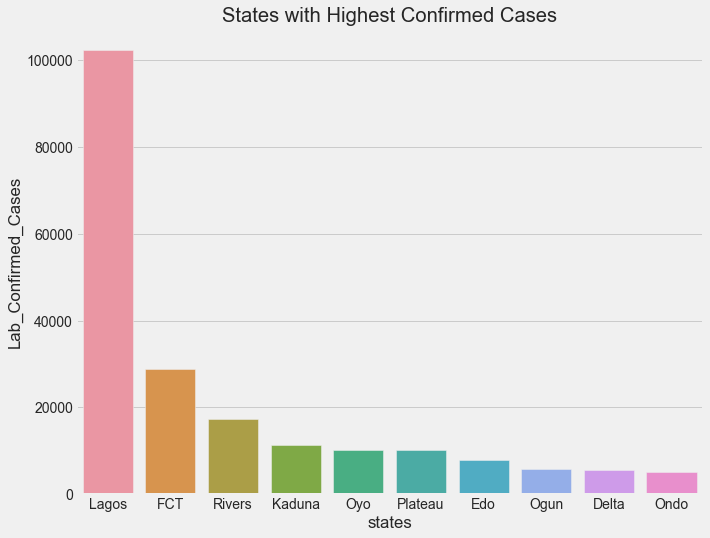

In [65]:
plt.figure(figsize=(10, 8))
sns.barplot(y='Lab_Confirmed_Cases', x='states', data=data1).set_title('States with Highest Confirmed Cases')

B

Generate a plot that shows the Top 10 states in terms of Discharged Covid cases.

In [66]:
data2=data.nlargest(10, 'Discharged')

Text(0.5, 1.0, 'States With Highest Discharged Cases')

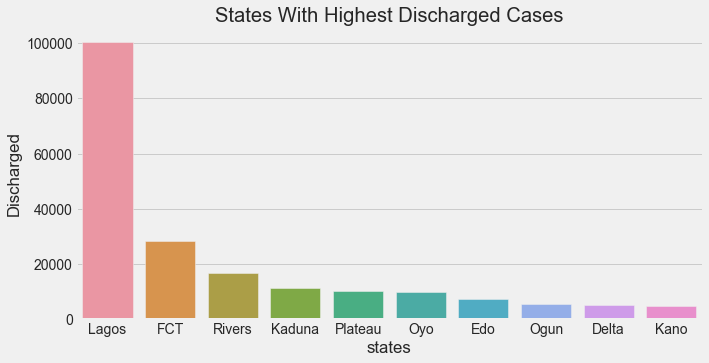

In [67]:
plt.figure(figsize=(10, 5))
sns.barplot(x='states', y='Discharged', data=data2).set_title('States With Highest Discharged Cases')

D

Plot the top 10 Death cases

In [68]:
data3=data.nlargest(10, 'Deaths')

Text(0.5, 1.0, 'States with Highest Death Cases')

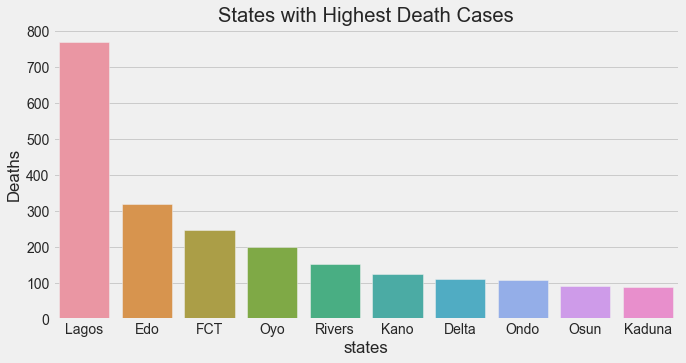

In [69]:
plt.figure(figsize=(10, 5))
sns.barplot(x='states', y='Deaths', data=data3).set_title('States with Highest Death Cases')

E

Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [70]:
nga.max()

Dates        2022-07-31 00:00:00
Confirmed                 260977
Recovered                 165208
Deaths                      3148
dtype: object

In [71]:
daily2= ['Confirmed','Recovered', 'Deaths' ]
for i in daily2:
    nga[i]= nga[i].astype('int64')

Text(0.5, 1.0, 'Total Daily Confirmed Cases')

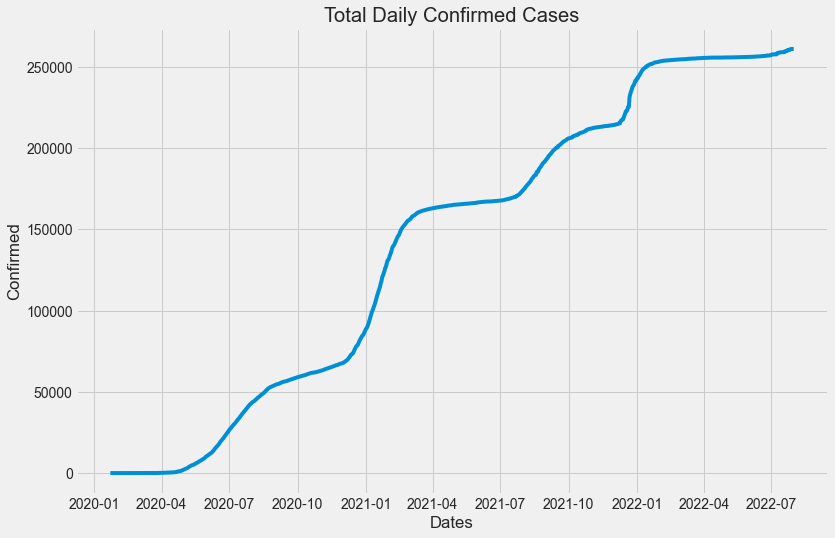

In [72]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Dates", y="Confirmed", data=nga).set_title('Total Daily Confirmed Cases')

Text(0.5, 1.0, 'Total Daily Recovered Cases')

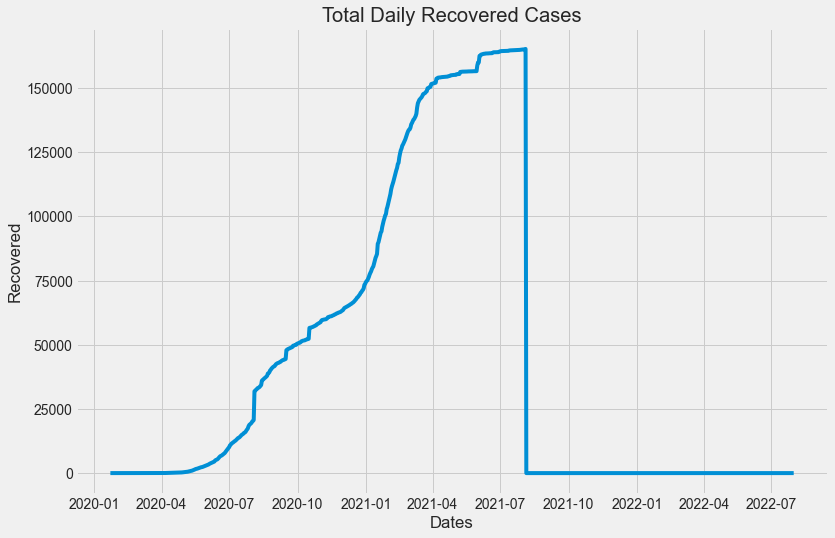

In [73]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Dates", y="Recovered", data=nga).set_title('Total Daily Recovered Cases')

Text(0.5, 1.0, 'Total Daily Death Cases')

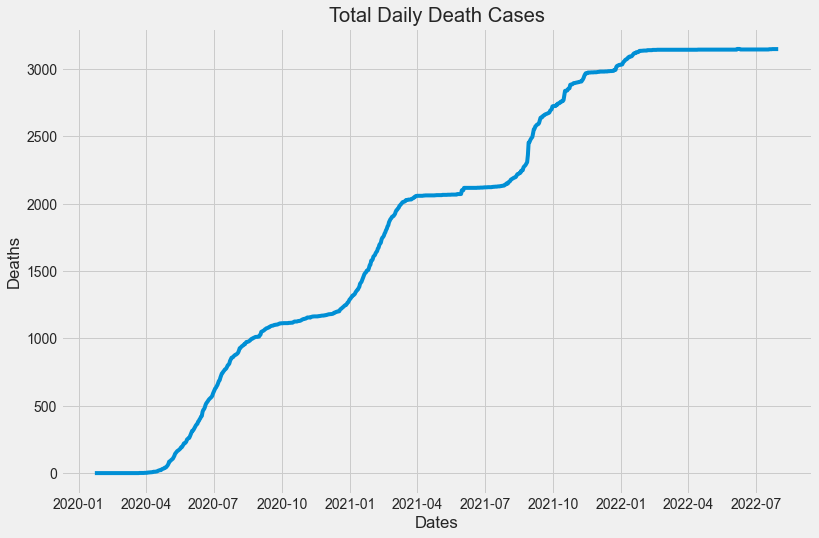

In [74]:
plt.figure(figsize=(12,8))
sns.lineplot(x="Dates", y="Deaths", data=nga).set_title('Total Daily Death Cases')

F

Determine the daily infection rate, you can use the Pandas diff method to find the derivate of the total cases

Generate a line plot for the above


In [75]:
dailyCC['infection rate'] = dailyCC['Confirmed'].diff()
dailyCC

,Dates,Confirmed,infection rate
0,2020-01-23,0,NaN
1,2020-01-24,0,0.0
2,2020-01-25,0,0.0
3,2020-01-26,0,0.0
4,2020-01-27,0,0.0
...,...,...,...
916,2022-07-27,260764,0.0
917,2022-07-28,260977,213.0
918,2022-07-29,260977,0.0
919,2022-07-30,260977,0.0


Text(0.5, 1.0, 'Daily Infection Rate')

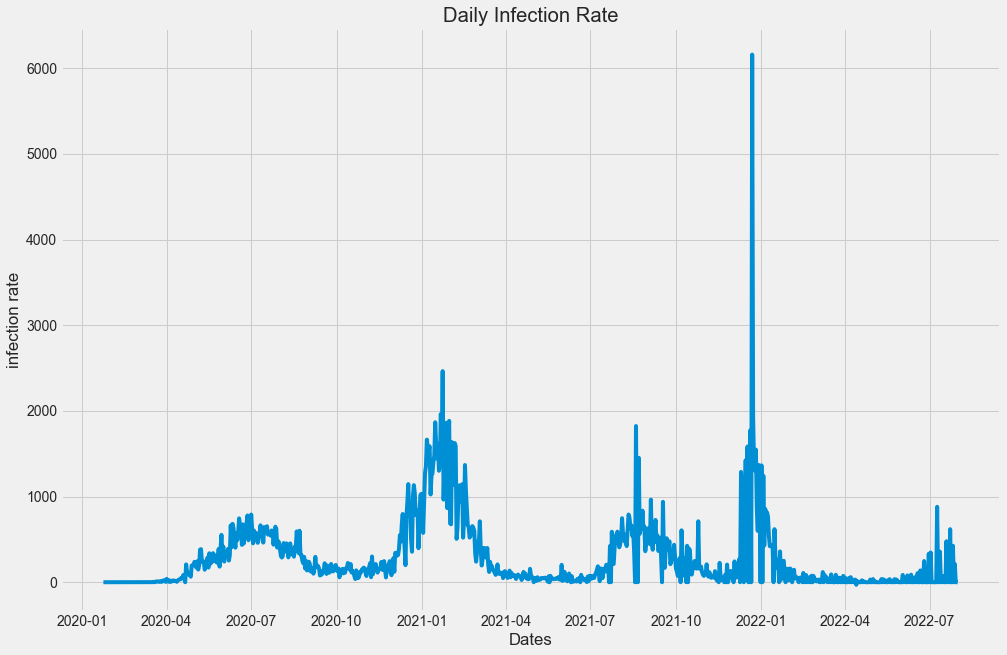

In [76]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Dates', y='infection rate', data=dailyCC).set_title('Daily Infection Rate')


G

Calculate maximum infection rate for a day (Number of new cases)

Find the date


In [77]:
dailyCC.loc[dailyCC['infection rate'] == dailyCC['infection rate'].max()]

,Dates,Confirmed,infection rate
699,2021-12-22,231413,6158.0


###### Date is 22nd December 2021

H

Determine the relationship between the external dataset and the NCDC COVID-19 dataset. 
Here you will generate a line plot of top 10 confirmed cases and the overall community vulnerability index on the same axis. From the graph, explain your observation.


In [78]:
newdata=pd.merge(data, covidext, on=['states'], how='inner')

In [79]:
newdata.head(10)

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,102332,979,100582,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28949,167,28533,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17252,383,16715,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11402,88,11225,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10311,49,10060,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10279,21,10183,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7821,102,7398,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5542,260,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5173,315,4749,109,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


In [80]:
dd22= newdata.nlargest(10, 'Lab_Confirmed_Cases')

In [81]:
dd22

,states,Lab_Confirmed_Cases,Cases on admission,Discharged,Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,102332,979,100582,771,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,28949,167,28533,249,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,17252,383,16715,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,11402,88,11225,89,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Oyo,10311,49,10060,202,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
5,Plateau,10279,21,10183,75,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
6,Edo,7821,102,7398,321,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5810,11,5717,82,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Delta,5542,260,5170,112,South South,6303000,0.4,0.6,0.7,0.2,1.0,0.6,0.5,0.4,1.08
9,Ondo,5173,315,4749,109,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04


<Figure size 1296x864 with 0 Axes>

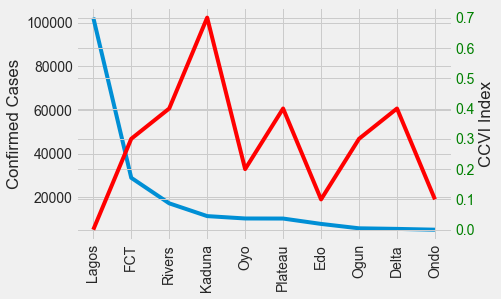

In [82]:
plt.figure(figsize=(18,12))
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(dd22['states'], dd22['Lab_Confirmed_Cases'])
plt.xticks(rotation=90)
ax1.set_ylabel('Confirmed Cases')


ax2 = ax1.twinx()
ax2.plot(dd22['states'], dd22['Overall CCVI Index'], 'r')
ax2.set_ylabel('CCVI Index')
for l in ax2.get_yticklabels():
    l.set_color('g')

from the graph;
*Lagos with highest number of confirmed cases has least ccvi index

*Edo and Ogun with low number of confirmed Cases also have low ccvi index

*Kaduna has the highest ccvi index with low confirmed cases.

I

Determine the relationship between the external dataset and the NCDC COVID-19 dataset

Text(0.5, 1.0, 'linear relationships between Confirmed Cases and Population Density.')

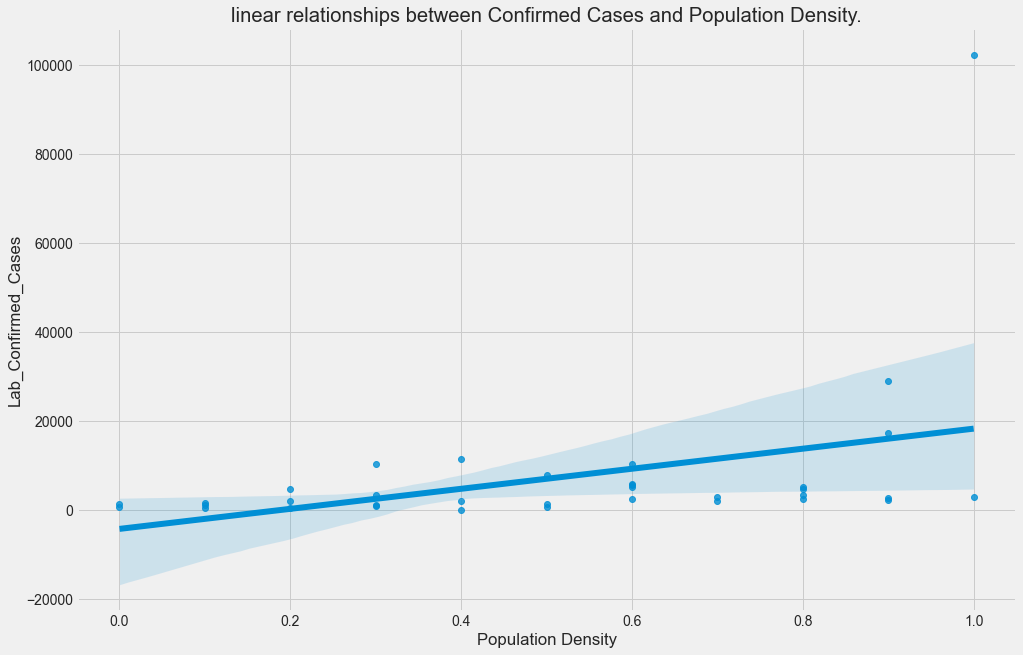

In [83]:
plt.figure(figsize=(15,10))
sns.regplot(y='Lab_Confirmed_Cases', x='Population Density', data=newdata).set_title('linear relationships between Confirmed Cases and Population Density.')

J

Text(0.5, 1.0, 'linear relationships between Deaths and Age')

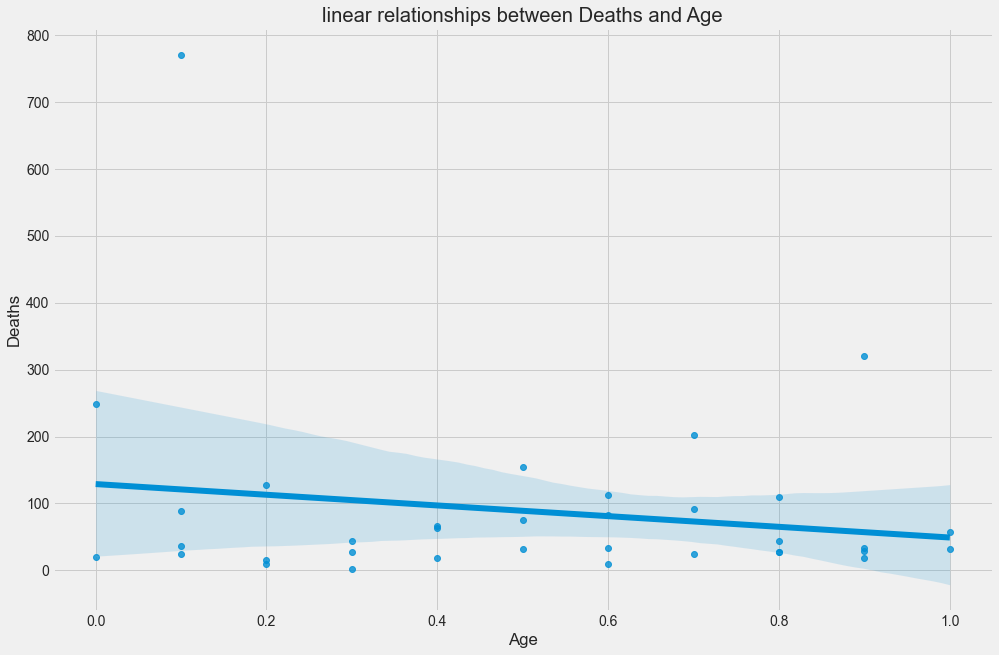

In [84]:
plt.figure(figsize=(15,10))
sns.regplot(y='Deaths', x='Age', data=newdata).set_title('linear relationships between Deaths and Age')


Text(0.5, 1.0, 'linear relationships - Confirmed Cases and Fragility.')

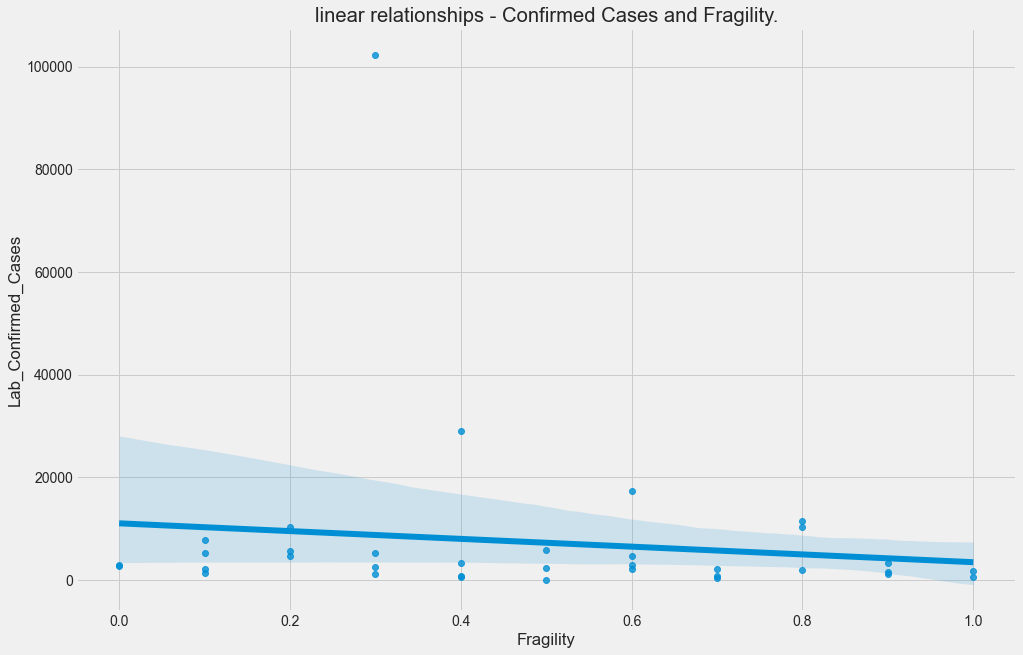

In [85]:
plt.figure(figsize=(15,10))
sns.regplot(y='Lab_Confirmed_Cases', x='Fragility', data=newdata).set_title('linear relationships - Confirmed Cases and Fragility.')

Text(0.5, 1.0, 'Linear Relationship between Deaths and Health System')

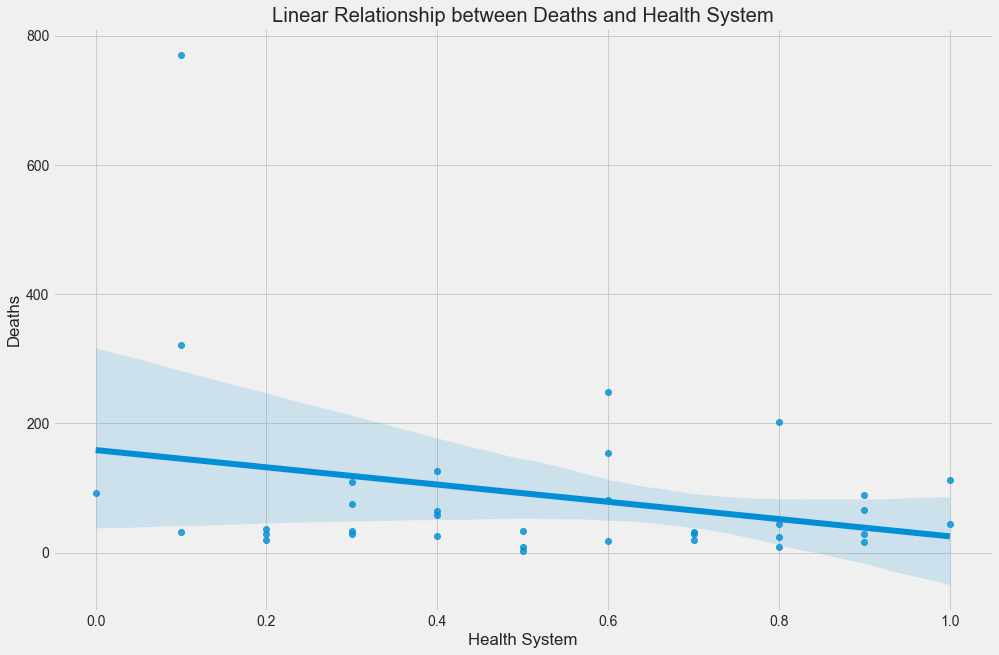

In [86]:
plt.figure(figsize=(15,10))
sns.regplot(y='Deaths', x='Health System', data=newdata).set_title('Linear Relationship between Deaths and Health System')

There's a positive correlation between confirmed cases and Poupulation density
The deaths are on the drop side on age with around 0.3
There's no correlation between deaths and health systems, lago with 0.1 has the highest death rate, Edo with also the same index(0.1) has only 321 with Ondo on 109.

L

In [87]:
RealGDP

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59
5,2019,16434552.65,16931434.89,18494114.17,19530000.00
6,2020,16740000.00,15890000.00,17820000.00,0.00


In [88]:
GDP=pd.melt(RealGDP, id_vars =['Year'], value_vars =['Q1', 'Q2', 'Q3', 'Q4'])

In [89]:
GDP

,Year,variable,value
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [90]:
RealGDP.iloc[6]['Q2']

15890000.0

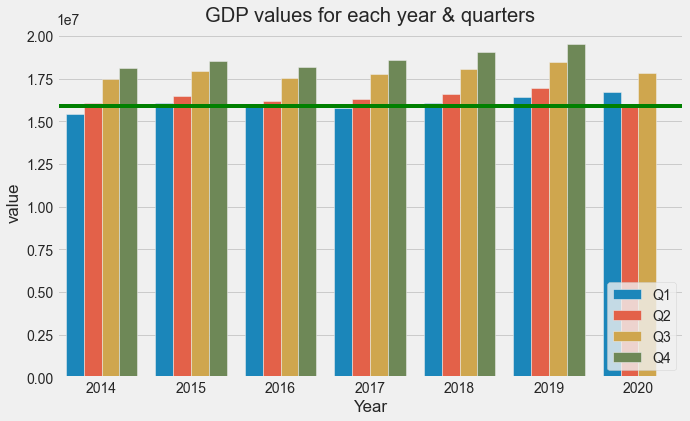

In [92]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='Year', y='value', hue='variable',  data=GDP).set_title('GDP values for each year & quarters')
plt.legend(loc='lower right')
plt.axhline(y =RealGDP.iloc[6]['Q2'], color ="green")



<AxesSubplot:xlabel='Year', ylabel='Q1'>

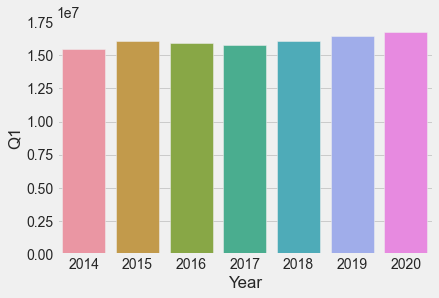

In [93]:
sns.barplot(x='Year', y='Q1',
    data= RealGDP)

Summary

Quarter 2 GDP dropped back to the lowest it has ever been since 2014, due to the restriction enforced by the government.
Quarter 4 has the highest value


#### Common questions and Answers


1.  When was COVID-19 declared a pandemic?

 The World Health Organization declared the outbreak a Public Health Emergency of International Concern on 30 January 2020, and a pandemic on 11 March 2020.

2. What is Nigeria doing to control the spread of the coronavirus disease in the country?

The Federal Government of Nigeria has initiated a Presidential Task Force on COVID-19 to provide high-level strategic national response to the disease in Nigeria. The Federal Ministry of Health has activated an NCDC-led national COVID-19 Emergency Operations Centre (EOC) to coordinate the national public health response. At state-level, preparedness and response activities are being coordinated through Public Health EOCs in each State.

3. Where can you be tested in Nigeria?

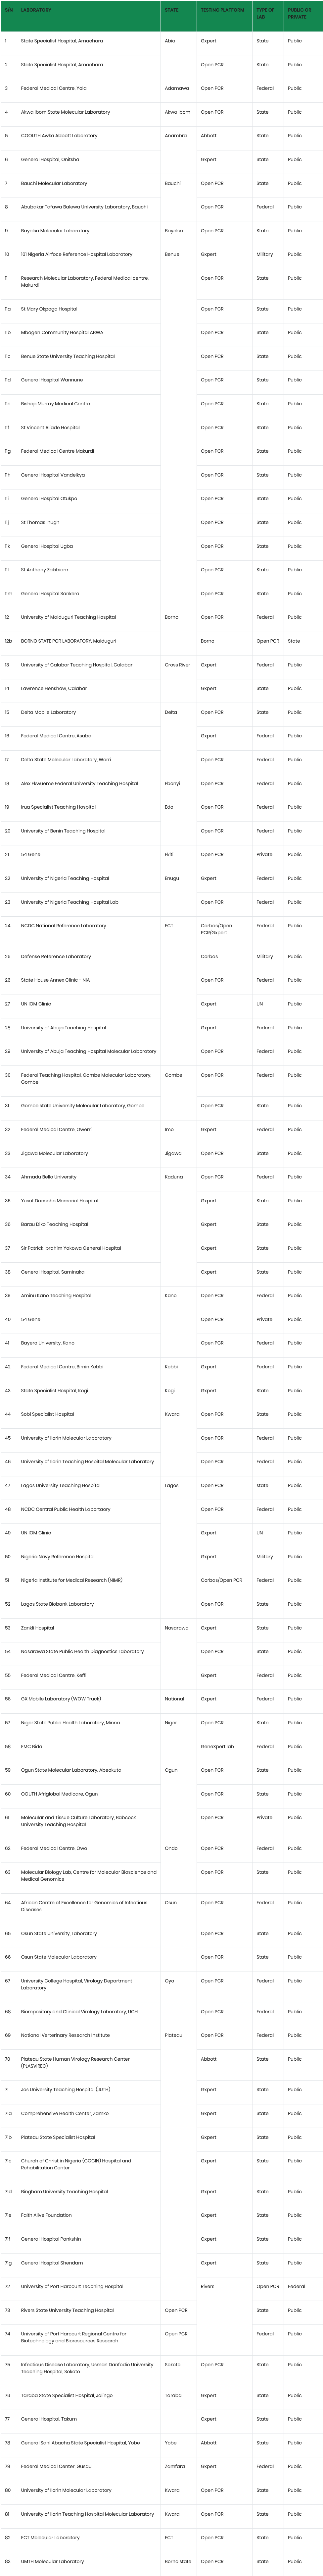